<a href="https://colab.research.google.com/github/MarcoMulas99/ISD/blob/main/MNIST_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Dataset**

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', cache=True)

[6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


(array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

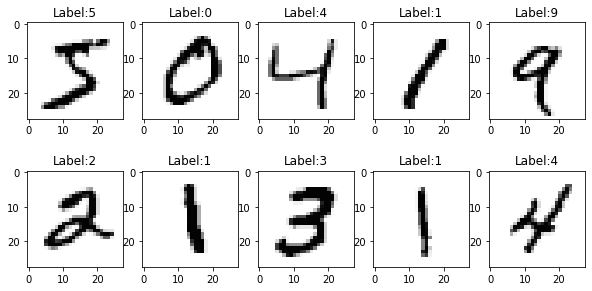

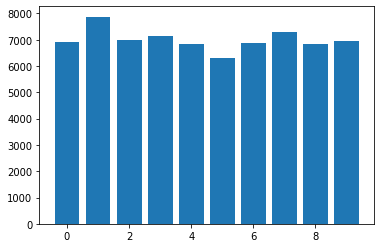

In [18]:
import numpy as np
from matplotlib import pyplot as plt

x = mnist.data / 255
y = np.array(mnist.target, dtype = int)

#print(x.shape, y.shape)
#print(y[0:10])
plt.figure(figsize=(10,5))

for i in range(10):
  plt.subplot(2,5,i+1)
  img = x[i,:].reshape(28,28)
  plt.imshow(img, cmap='Greys')
  plt.title("Label:"+str(y[i]))

# count how many elements i hava in each class
def samples_per_class(y):
  labels = np.unique(y)
  n_classes = labels.size

  n_samples_per_class = np.zeros(shape=(n_classes),dtype=int)

  for i in range(n_classes):
    n_samples_per_class[i] = sum(y==i)
  print(n_samples_per_class)

  plt.figure()
  plt.bar(labels,n_samples_per_class)
  return n_samples_per_class, labels

samples_per_class(y)

[62544 32205 65040 ...   988 69922  5386]
[ 90 101 101 111  93  88 112  99 104 101]
[105 107  97 116  99  91  89  95 108  93]


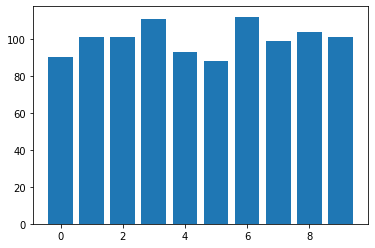

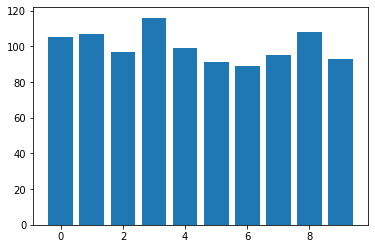

In [31]:
# data splits: goal is to split X,y into two disjoint sets.

n_tr = 1000
n_ts = 1000

def split_data(x,y, n_tr, n_ts):
  n_samples = x.shape[0]

  idx = np.linspace(0, n_samples-1, num=n_samples, dtype=int)
  np.random.shuffle(idx)
  print(idx)

  idx_tr = idx[:n_tr]
  idx_ts = idx[n_tr:n_tr+n_ts]

  x_tr = x[idx_tr, :]
  y_tr = y[idx_tr]

  x_ts = x[idx_ts, :]
  y_ts = y[idx_ts]

  return x_tr, y_tr, x_ts, y_ts

x_tr, y_tr, x_ts, y_ts = split_data(x, y, n_tr, n_ts)

n_tr_samples_per_class, class_labels = samples_per_class(y_tr)
n_ts_samples_per_class, class_labels = samples_per_class(y_ts)


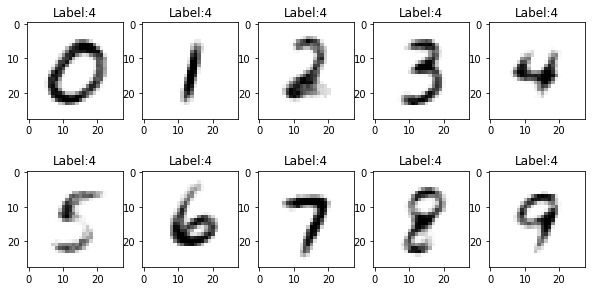

In [38]:
#we want to compute di average (centroid) image for each class (from the trainig set)
def fit(x_tr, y_tr):
  n_classes = np.unique(y_tr).size
  n_features = x_tr.shape[1]

  centroids = np.zeros(shape=(n_classes, n_features))

  #print(centroids.shape)
  for k in range(n_classes):
    xk = x_tr[y_tr==k,:]
    centroids[k] = np.mean(xk, axis=0)
    #plt.imshow(centroids[k].reshape(28,28))
  return centroids

centroids=fit(x_tr, y_tr)

#visualize the centroids
plt.figure(figsize=(10,5))
for k in range(n_classes):
  plt.subplot(2,5,k+1)
  img = centroids[k,:].reshape(28,28)
  plt.imshow(img, cmap='Greys')
  plt.title("Label:"+str(y[i]))



In [52]:
from sklearn.metrics import pairwise_distances
#predict
n_ts_samples = x_ts.shape[0]
n_classes = centroids.shape[0]

dist = np.zeros(shape = (n_ts_samples, n_classes))

'''
#start_time = time.time()
for i in range(n_ts_samples):
  for k in range(n_classes):
    dist[i,k] = np.sum((x_ts[i,:]-centroids[k,:])**2)
#print(time.time()-start_time)

#start_time = time.time()
for k in range(n_classes):
  dist[:,k] = np.sqrt(np.sum((x_ts-centroids[k,:])**2, axis=1))
#print(time.time()-start_time)
  
#start_time = time.time()
dist = pairwise_distances(x_ts, centroids)
#print(time.time()-start_time)

#print(dist)

m = np.argmin(dist, axis=1)
print(m.shape)
'''

def predict (x_ts, centroids):
  dist = pairwise_distances(x_ts, centroids)
  y_pred = np.argmin(dist, axis=1)
  return y_pred

y_pred = predict(x_ts, centroids)

print(y_pred.shape, y_ts.shape)
print(y_pred-y_ts)



(1000,) (1000,)
[ 0  0  0  0  0 -4  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -2  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0 -4  0  6  0  5  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0 -4  2  0  0  2  0  1  0  0 -2  5  0
 -3  0  0  0  0  0  0  0  0 -6  0  1  0  0 -3  0 -1  0  0  0  0  0  0 -5
  1  0  0  0  0  0  1  0  0  0  0  0  0 -2 -2  0  0  0  4  0  0  0  0 -1
  0 -5  0  0  0  1  0  2  0  0  0  0  0  0  0 -5  0  0  0  0  2  2  0  0
  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0 -2  1  0  0  0  0  0  0  0
  0  0  0  0  0  0 -6  0  0 -1 -3  0  0  0  0  0  0  7  0  0  0  0  0  0
 -4  0  0  2  0  1  0 -1  2  8  0  0 -2  0  0  0  0  0  0  0  0 -7  0  5
 -1  0  0  0  0  0 -7 -3 -4  0  0  0  0  0  0  0  0  0  0  0  5 -2  0  2
  0  0 -5  0  0  5  1 -5  5  0  0  0  5 -2  0  0 -1  0  0  0  0  0  0  0
  2  0 -6  0  0  0 -8  0 -6  0  0  0  0  0 -3  0  0 -4 -2  5 -2  0  4  0
  0  0  0  0  0  0 -5  7  0  0 -2  0  0  0  0  0  0  4 -8  0  0  0  0  0
  0 -5  0  0  0  2  0  7  0  0 -6  